<a href="https://colab.research.google.com/github/GouthamVignesh/Prompt-Tune-Generation-Cohere/blob/main/TuneGenerationUsingPrompt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

samplerate = 44100 #Frequecy in Hz

def get_wave(freq, duration=0.5):
    '''
    Function takes the "frequecy" and "time_duration" for a wave 
    as the input and returns a "numpy array" of values at all points 
    in time
    '''
    
    amplitude = 4096
    t = np.linspace(0, duration, int(samplerate * duration))
    wave = amplitude * np.sin(2 * np.pi * freq * t)
    
    return wave

# To get a 1 second long wave of frequency 440Hz
a_wave = get_wave(440, 1)

#wave features
print(len(a_wave)) # 44100
print(np.max(a_wave)) # 4096
print(np.min(a_wave)) # -4096

44100
4095.9996855891045
-4095.999685589104


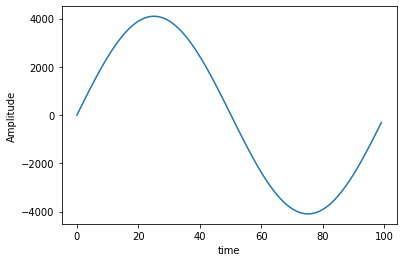

In [2]:
import matplotlib.pyplot as plt
plt.plot(a_wave[0:int(44100/440)])
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.show()

In [3]:
from pprint import pprint

def get_piano_notes():
    '''
    Returns a dict object for all the piano 
    note's frequencies
    '''
    # White keys are in Uppercase and black keys (sharps) are in lowercase
    octave = ['C', 'c', 'D', 'd', 'E', 'F', 'f', 'G', 'g', 'A', 'a', 'B'] 
    
    base_freq = 261.63 #Frequency of Note C4
    
    note_freqs = {octave[i]: base_freq * pow(2,(i/48)) for i in range(len(octave))}        
    note_freqs[''] = 0.0 # silent note
    
    return note_freqs
  
# To get the piano note's frequencies
note_freqs = get_piano_notes()
pprint(note_freqs)
'''
    {'': 0.0,
    'A': 440.00745824565865,
    'B': 493.8916728538229,
    'C': 261.63,
    'D': 293.66974569918125,
    'E': 329.63314428399565,
    'F': 349.2341510465061,
    'G': 392.0020805232462,
    'a': 466.1716632541139,
    'c': 277.18732937722245,
    'd': 311.1322574981619,
    'f': 370.00069432367286,
    'g': 415.31173722644}
'''

{'': 0.0,
 'A': 297.9412705113932,
 'B': 306.67161612578076,
 'C': 261.63,
 'D': 269.2963441730368,
 'E': 277.18732937722245,
 'F': 281.2191119234518,
 'G': 289.4594608897055,
 'a': 302.2749260826928,
 'c': 265.43549597970434,
 'd': 273.2133496964843,
 'f': 285.3095380972114,
 'g': 293.66974569918125}


"\n    {'': 0.0,\n    'A': 440.00745824565865,\n    'B': 493.8916728538229,\n    'C': 261.63,\n    'D': 293.66974569918125,\n    'E': 329.63314428399565,\n    'F': 349.2341510465061,\n    'G': 392.0020805232462,\n    'a': 466.1716632541139,\n    'c': 277.18732937722245,\n    'd': 311.1322574981619,\n    'f': 370.00069432367286,\n    'g': 415.31173722644}\n"

### Piano Keyboard layout with single octave used as a virutal piano with base frequency for each keys

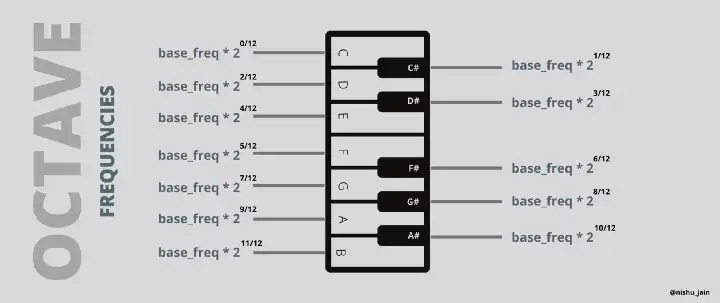

In [4]:
!pip install cohere

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for cohere: filename=cohere-2.9.1-cp38-cp38-linux_x86_64.whl size=9627 sha256=ad95f57d8e66fc034e2512423f00ea7731aa3dd377ce83bcd3f32bd8e276c07a
  Stored in directory: /root/.cache/pip/wheels/c8/79/5b/36adcce533f4b0ed540beef7e6ea61d637a10cb2c8d4670153
Successfully built cohere


In [11]:
import cohere
co = cohere.Client('<--Cohere API key-->')

response = co.generate(
  model='large',
  prompt= f"""  
This program generates a new tune for children.

Genre : Children Music  
keys: E-D-C-D-E-E-E--D-D-D--E-G-G--E-D-C-D-E-E-E--D-D-E-D-C  
--  
Genre: Children Music  
keys: C-C-G-G-A-A-G--F-F-E-E-D-D-C--G-G-F-F-E-E-D--G-G-F-F-E-E-D--C-C-G-G-A-A-G--F-F-E-E-D-D-C  
--  
Genre: Ambient Music  
keys: E-E-F-G--G-F-E-D--C-C-D-E-E-D-C--E-E-F-G--G-F-E-D--C-C-D-E-D-C-C  
--  
Genre: Ambient Music   
keys: C-D-E-E--D-C-D-E-C-g--C-D-E-E--D-C-D-E-C--C-g-C-E-G-G-G--G-A-G-F-E-D-C--G-G-G--g-g-g--G-G-G--g-g-g--G-F-E-D  
--  
Genre: Ambient Music  
keys: C-C-C-D-E-E--E-D-C-D-E-C--E-E-F-G-G--F-E-F-G-E--A-A-A-G-E--D-E-D-C-a-g-g-g--C-C-C-D-E-E--E-D-C-D-E-C  
--  
Genre: electronic
keys: c-d-c-B-B-c-B-g--B-c-d-E d-c--c-d-c-B-B-c-B-g--B-c-d-E-d-c--c-d-c-B-B-c-B-g--E-f-E-d-c-c-d--f-E-d-c-c-d--d-c-B-d-c--B-c-c-d-B-c--c-d-d-c-B-a-g-c-d-d
--
Genre:Pop
keys:D-B-A-G-G-G-G-G--D-B-A-G-A-A-A-A--D-B-A-G-G-G-G-G--G-G-G-A-A-B-A-D-B-A-G-G--D-B-A-G-G-G-G-G--D-B-A-G-A-A-A-A--D-B-A-G-G-G-G-G--G-G-G-A-A-B-B-D--B-A-G-G--D-B-A-G-D-B-A-G
--
Genre:Pop
keys:a-C-D-a-F-d-D-C-D--a-C-D-a-F-d-D-C-a--a-C-D-a-F-G-D-C-D--D-D-d-D-C-a-a--G-a-d-F-D-C-a--D-G-F-F-G-D-C-a-D-F-F-G-F-d-D
--
Genre:Pop
keys:D-a-A-G-F-D-C-a-D-F-G-D-C-D-a-C-a-a--D-C-a-D-F-F-G-D-D-D-a-a-A-G-a-A-G--G-G-a-G-G-D-C-C-G-F-D-C-a-A-G--a-G
--
Genre:Rock
keys:F-G-A-G-F-G-F-G-A-G-F-D--F-G-A-G-G-F-G-A-G-F--F-C-A-G-G-G-F-G-A-G-F--G-F-G-A-G-F--F-G-A-G-G-G-G-F-G-A-G-F
--
Genre:Rock
keys:F-G-A-G-G-G-G-G-G-F-G-A-G-F--F-C-A-G-G-G-G-F-G-A-G-F--F-F-G-F-G-A-G-F--C- C-C-C-A-A-G-G-A--C-C-C-A-A-G-G-F-F-E-D
--
Genre:Jazz
keys:F-C-a-a-A-A-g-g-A--F-G-G-A-A-A-A-G,-F-F-G-G-G--F-G-A-A-A-A-G-G--G-G-G-A-D--C-a-A-a-A-G-G--A-C-D-C-D-C-D-E
--
Genre:Jazz
keys:C-F-E-D-E-C-D-C-F-F-F-G--A-A-F-E-D-E-D-C--A-A-F-E-D-E-D-C--A-C-D-C-D-C-D-E
--
Genre:Rock
keys:E-B-c-B-A-g-f-f-f-E-E--E-E-E-B-c-B-A-g-g-f-E-f-f-E-E--E-E-c-f-g-E-c-E--E-c-E-E-E-E-c-E--E-E-E-c-E-E-E-c-E-c-E
--
Genre:Rock
keys:E-E-E-E-E-c-E--E-E-E-E-f-f-E-c-B--E-E-E-E-E-E-E--E-c-E-E-c-E-E-E-B--E-E-E-c-E
--
Genre:hip hop
keys:C-G-g-a-F-F--C-G-g-a-F-F--C-a-C-d-C--C-a-g-F--g-a-d-c--C-F-d-C--a-C-d-C--C-a-g-F--g-a-d-C--C-F-d-C
--
Genre: want to hear children music 
keys:""",
max_tokens=100
)


new_song = response.generations[0].text
print(new_song)
if new_song.find("\n"):
  new_song = new_song.split("\n")[0]
print("---------")
print(type(new_song))
final_song = new_song.strip("-")
print(final_song)

 C-D-C-D-D-C-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-
---------
<class 'str'>
 C-D-C-D-D-C-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D


In [12]:
import numpy as np

def get_song_data(music_notes):
    '''
    Function to concatenate all the waves (notes)
    '''
    note_freqs = get_piano_notes() # Function that we made earlier
    song = [get_wave(note_freqs[note]) for note in music_notes.split('-')]
    song = np.concatenate(song)
    return song

data = get_song_data(final_song.strip())

#data = data * (16300/np.max(data)) # Adjusting the Amplitude (Optional)

In [13]:
from scipy.io.wavfile import write
write('new_song.wav', samplerate, data.astype(np.int16))

##Overall Pipeline Diagram

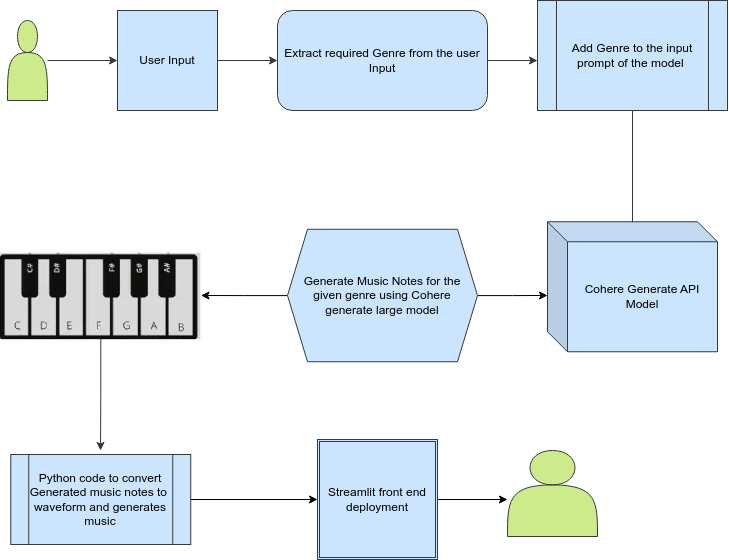